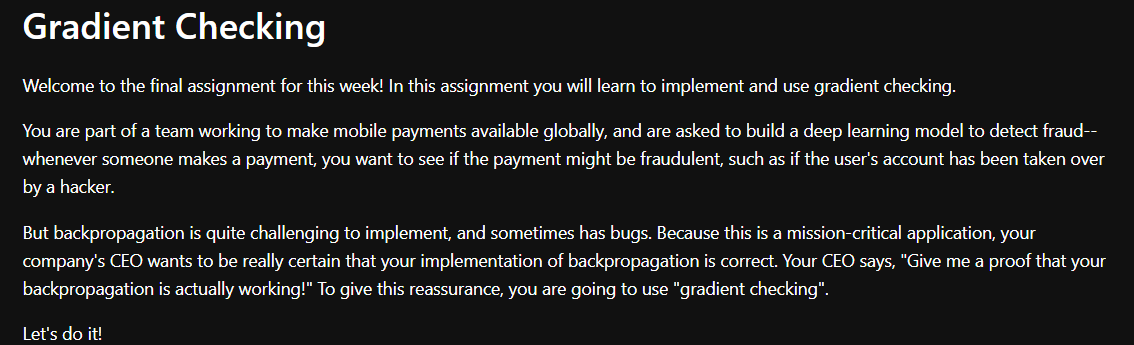

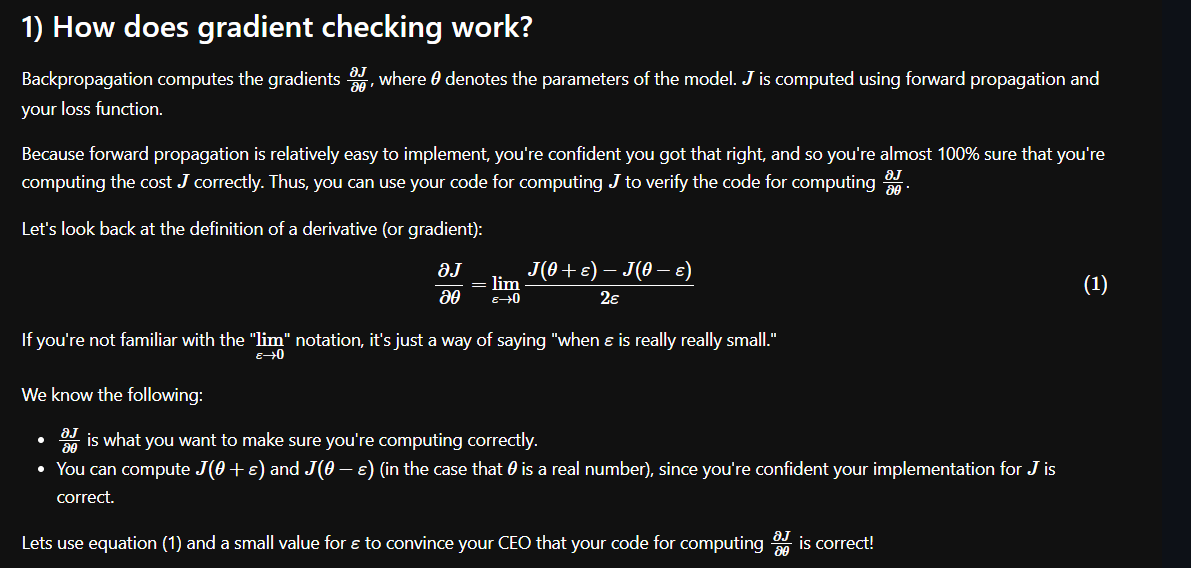

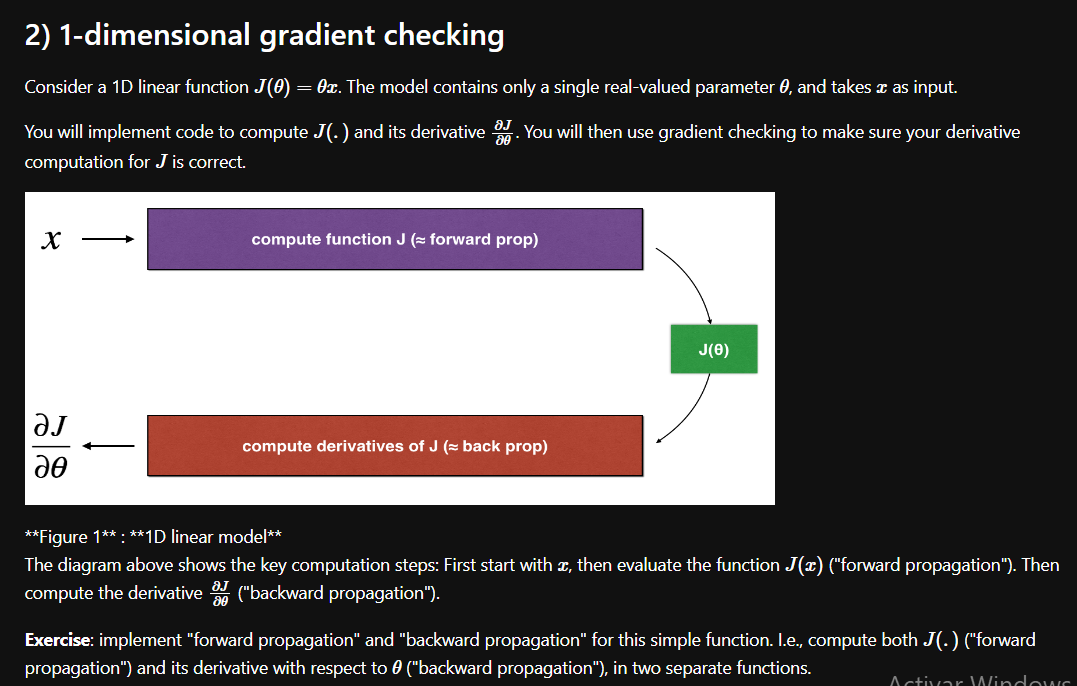

In [3]:
import numpy as np

# Define the 1D linear function f(x) = ax
def linear_function(x, a):
    return a * x

# Compute the numerical gradient of f(x) at a given point x
def compute_numerical_gradient(f, x, a, epsilon=1e-7):
    # Initialize gradient
    grad = 0.0

    # Use numerical approximation to compute the gradient
    # Gradient approximation: (f(x + epsilon) - f(x - epsilon)) / (2 * epsilon)
    grad = (f(x + epsilon, a) - f(x - epsilon, a)) / (2 * epsilon)

    return grad

# Compute the analytical gradient of f(x) with respect to 'a'
def compute_analytical_gradient(x, a):
    return x

# Perform gradient checking
def gradient_check(x, a):
    # Compute analytical gradient
    analytical_grad = compute_analytical_gradient(x, a)

    # Compute numerical gradient
    numerical_grad = compute_numerical_gradient(linear_function, x, a)

    # Compare analytical gradient with numerical gradient
    print("Analytical Gradient:", analytical_grad)
    print("Numerical Gradient:", numerical_grad)

    # Compute the difference between numerical and analytical gradients
    difference = np.abs(analytical_grad - numerical_grad)
    print("Gradient Difference:", difference)

    # Set a threshold for gradient checking
    epsilon = 1e-7
    if difference < epsilon:
        print("Gradient checking passed! The gradient is likely correct.")
    else:
        print("Gradient checking failed! The gradient might be incorrect.")

# Example usage
x = 3.0  # Input value of x
a = 3.0  # Parameter 'a' of the linear function

# Perform gradient checking
gradient_check(x, a)

Analytical Gradient: 3.0
Numerical Gradient: 2.9999999995311555
Gradient Difference: 4.688445187639445e-10
Gradient checking passed! The gradient is likely correct.


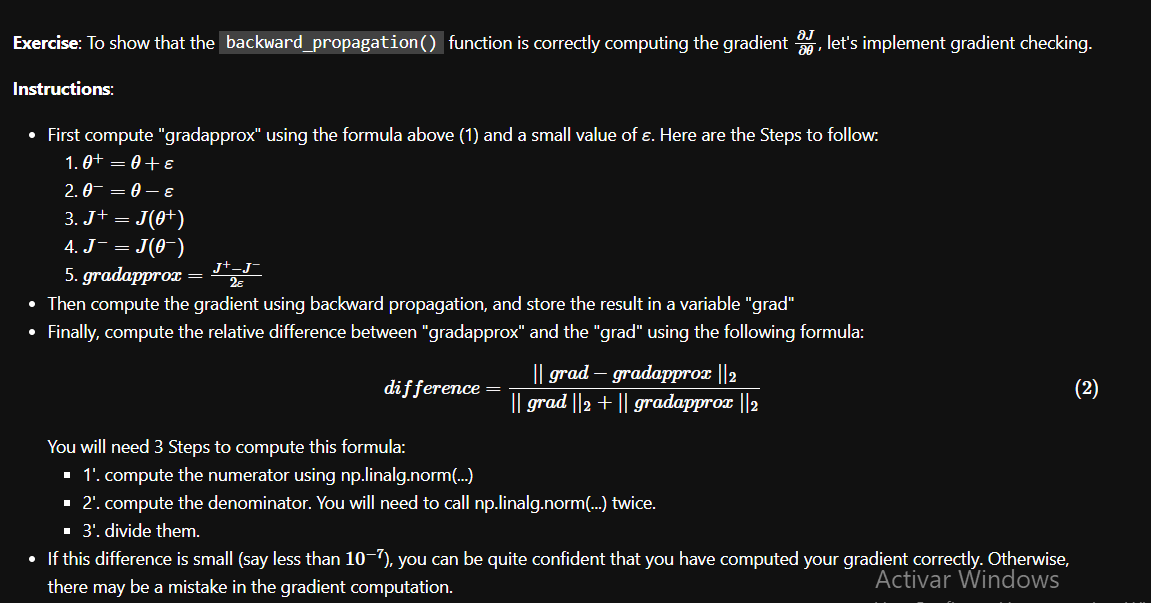

In [4]:
import numpy as np

def gradient_check(x, theta, epsilon=1e-7):
    """
    Implement gradient checking for a 1D linear function f(x) = theta * x.

    Arguments:
    x -- a real-valued input
    theta -- the parameter of the linear function
    epsilon -- tiny shift to the parameter to compute the approximated gradient

    Returns:
    difference -- difference between the approximated gradient and the true gradient
    """

    # Step 1: Compute J_plus(theta) = f(theta + epsilon) * x
    thetaplus = theta + epsilon
    J_plus = thetaplus * x

    # Step 2: Compute J_minus(theta) = f(theta - epsilon) * x
    thetaminus = theta - epsilon
    J_minus = thetaminus * x

    # Step 3: Compute the numerical approximation of the gradient (gradapprox)
    gradapprox = (J_plus - J_minus) / (2 * epsilon)

    # Step 4: Compute the gradient of f(theta) = theta * x
    grad = x

    # Step 5: Compute the difference between the numerical approximation and the true gradient
    numerator = np.linalg.norm(gradapprox - grad)  # ||gradapprox - grad||
    denominator = np.linalg.norm(gradapprox) + np.linalg.norm(grad)  # ||gradapprox|| + ||grad||
    difference = numerator / denominator

    # Step 6: Compare difference with a threshold (1e-7) to check the correctness of the gradient
    if difference < 1e-7:
        print("The gradient is correct!")
    else:
        print("The gradient is wrong!")

    return difference

In [5]:
x = 2.0  # Input value of x
theta = 3.0  # Parameter theta of the linear function

difference = gradient_check(x, theta)
print("Difference:", difference)

The gradient is correct!
Difference: 8.182894368803594e-10


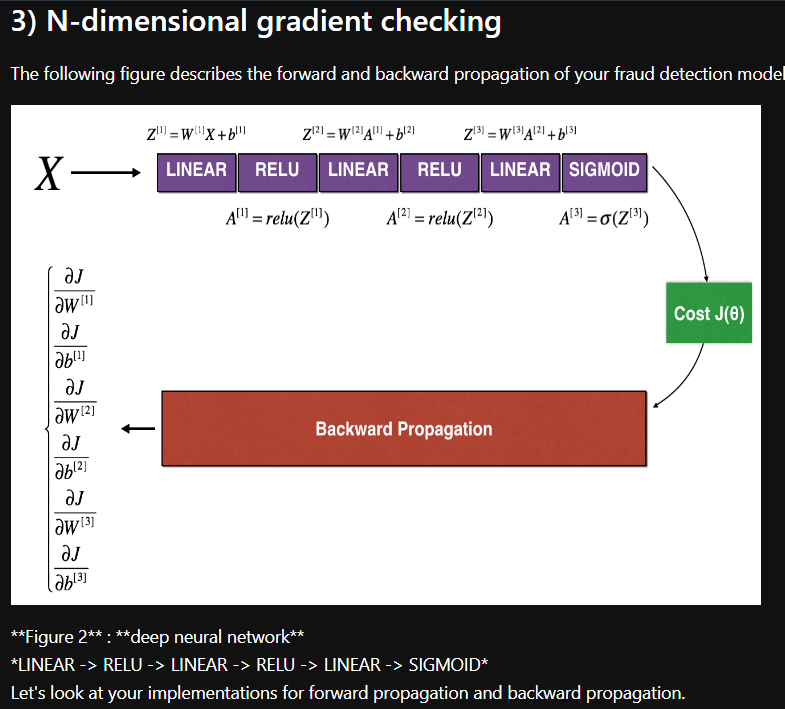

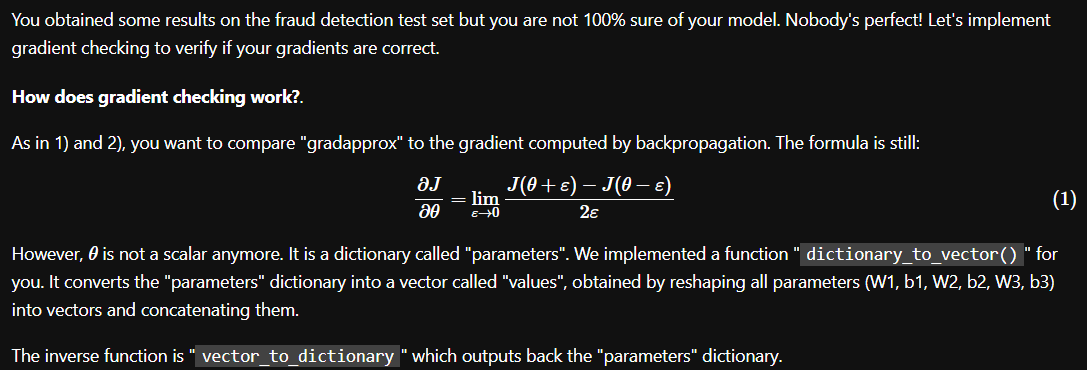

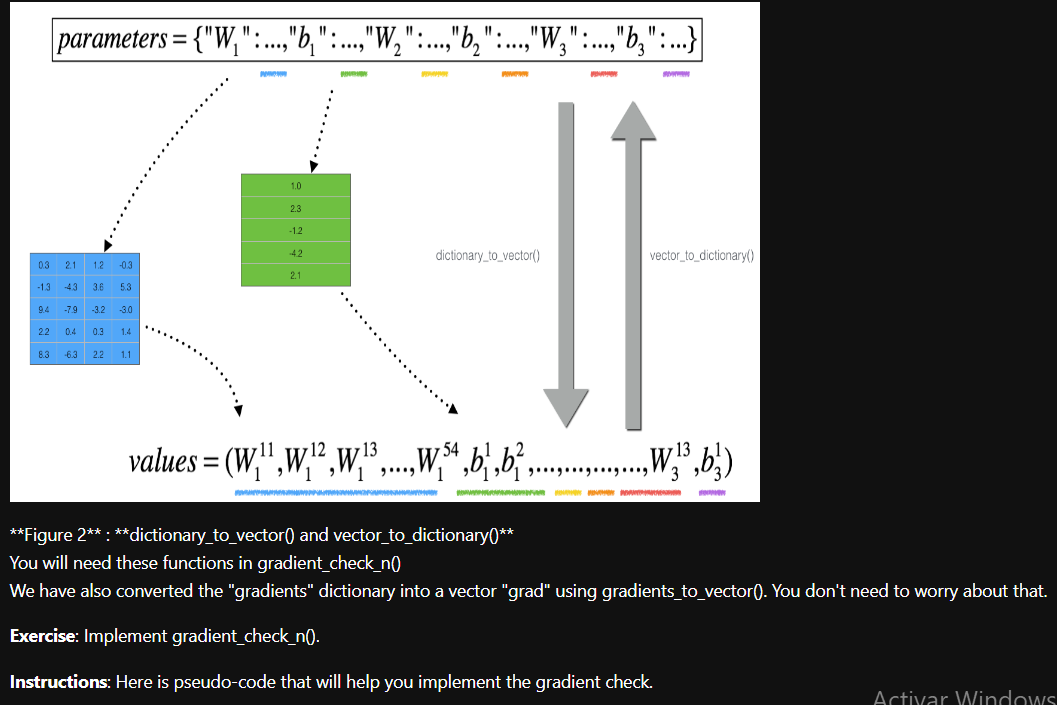

In [ ]:
# GRADED FUNCTION: gradient_check_n

def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n

    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters.
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)

    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """

    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))

    # Compute gradapprox
    for i in range(num_parameters):

        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        ### START CODE HERE ### (approx. 3 lines)
        thetaplus = np.copy(parameters_values)                                       # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                  # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))  # Step 3
        ### END CODE HERE ###

        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        ### START CODE HERE ### (approx. 3 lines)
        thetaminus = np.copy(parameters_values)                                       # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                                 # Step 2
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus)) # Step 3
        ### END CODE HERE ###

        # Compute gradapprox[i]
        ### START CODE HERE ### (approx. 1 line)
        gradapprox[i] = (J_plus[i] - J_minus[i])/(2*epsilon)
        ### END CODE HERE ###

    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad - gradapprox)                       # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)     # Step 2'
    difference = numerator/denominator                                  # Step 3'
    ### END CODE HERE ###

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")

    return difference

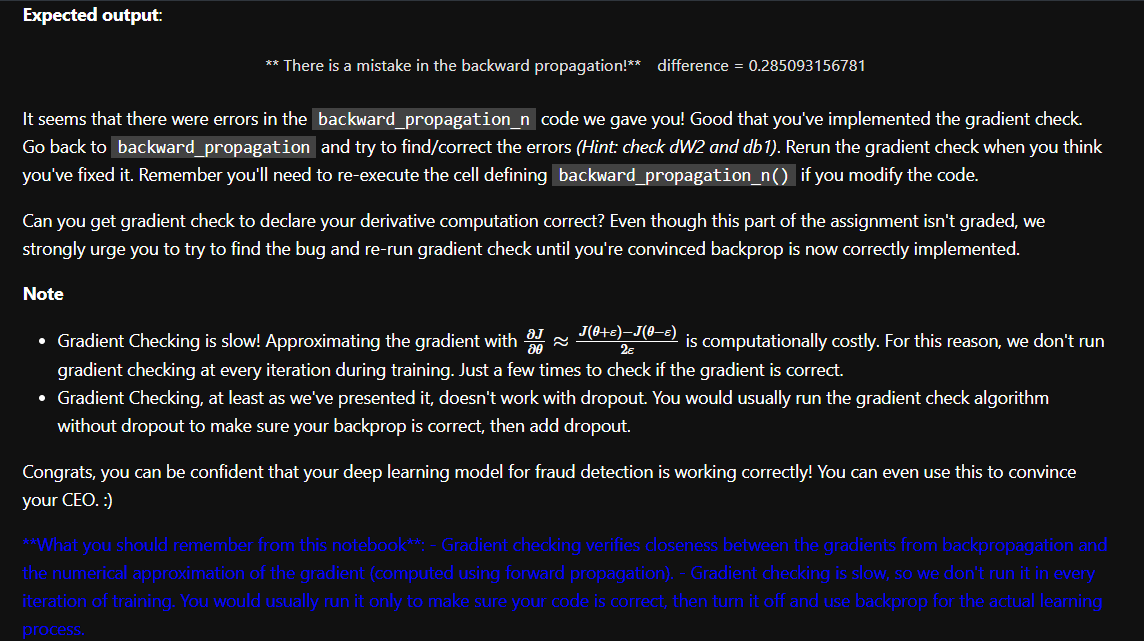

In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)  # Reshape to make it a column vector

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Define the neural network architecture
input_size = 4
hidden_size = 5
output_size = 3

# Initialize weights and biases
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward propagation
def forward_propagation(X):
    # Hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    # Output layer
    z2 = np.dot(a1, W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    return probs

# Loss function (cross-entropy)
def calculate_loss(X, y):
    num_examples = len(X)
    probs = forward_propagation(X)
    corect_logprobs = -np.log(probs[range(num_examples), np.argmax(y, axis=1)])
    data_loss = np.sum(corect_logprobs)
    return 1./num_examples * data_loss

# Gradient checking
def gradient_checking(X, y, epsilon=1e-7):
    # Compute gradients using backpropagation
    probs = forward_propagation(X)
    num_examples = len(X)
    delta = 1e-7

    # Backpropagation
    error = probs - y
    grad_W2 = np.dot(sigmoid(np.dot(X, W1) + b1).T, error)
    grad_b2 = np.sum(error, axis=0, keepdims=True)
    delta_hidden = np.dot(error, W2.T) * sigmoid(np.dot(X, W1) + b1) * (1 - sigmoid(np.dot(X, W1) + b1))
    grad_W1 = np.dot(X.T, delta_hidden)
    grad_b1 = np.sum(delta_hidden, axis=0)

    # Flatten all gradients into a single vector
    grad_backprop = np.concatenate((grad_W1.ravel(), grad_b1.ravel(), grad_W2.ravel(), grad_b2.ravel()))

    # Compute numerical gradients
    num_grad = []
    params = [W1, b1, W2, b2]

    for param in params:
        shape = param.shape
        param_flattened = param.ravel()
        grad_approx = np.zeros_like(param_flattened)

        for i in range(len(param_flattened)):
            original_value = param_flattened[i]
            # Compute f(x + epsilon)
            param_flattened[i] = original_value + epsilon
            loss_plus = calculate_loss(X, y)

            # Compute f(x - epsilon)
            param_flattened[i] = original_value - epsilon
            loss_minus = calculate_loss(X, y)

            # Compute numerical gradient
            grad_approx[i] = (loss_plus - loss_minus) / (2 * epsilon)
            param_flattened[i] = original_value

        num_grad.append(grad_approx)

    num_grad = np.concatenate(num_grad)

    # Compare gradients
    numerator = np.linalg.norm(num_grad - grad_backprop)
    denominator = np.linalg.norm(num_grad) + np.linalg.norm(grad_backprop)
    difference = numerator / denominator

    print(f"Gradient difference: {difference}")

# Perform gradient checking
gradient_checking(X_train, y_train)

Gradient difference: 0.9834710743915481


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
